* A toy implementation of Vanilla GAN with TensorFlow
* Original paper: [Generative Adversarial Networks](https://arxiv.org/abs/1406.2661), Goodfellow et al, NIPS 2014

In [1]:
import time
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

In [2]:
tf.__version__

'1.2.1'

# Utilities

In [3]:
def show_image(x):
    """Show gray image from 28x28 matrix"""
    if len(x.shape) == 2:
        plt.figure(figsize = (1,1))
        plt.axis('off')
        plt.imshow(1-x, cmap=cm.Greys)
    else:
        plt.figure(figsize = (16,16))
        for i in range(x.shape[0]):
            plt.subplot(1, x.shape[0], i+1)
            plt.axis('off')
            plt.imshow(1-x[i], cmap=cm.Greys)
    plt.show()

In [4]:
def show_loss_chart(rounds, d_loss_values, g_loss_values):
    sns.set_style("darkgrid")
    plt.plot(rounds, d_loss_values, 'g', label="Discriminator")
    plt.plot(rounds, g_loss_values, 'r', label="Generator")
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
    plt.show()

# Load data

In [5]:
mnist = input_data.read_data_sets('mnist/', one_hot = True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [6]:
IMG_W = 28
IMG_H = 28
IMG_SIZE = IMG_W * IMG_H

Z_SIZE = 100
G_HIDDEN_SIZE = 128
D_HIDDEN_SIZE = 128

BATCH_SIZE = 100

K = 1

# Show some real MNIST training images

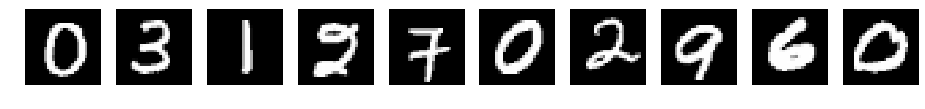

In [7]:
show_image(mnist.train.images[10:20].reshape((10,IMG_W, IMG_H)))

# Build Generator & Discriminator

### Generator

In [8]:
def init(shape):
    # Xavier init
    # Ref: https://prateekvjoshi.com/2016/03/29/understanding-xavier-initialization-in-deep-neural-networks/
    in_size, out_size = shape
    stddev = 1. / tf.sqrt((in_size+out_size) / 2.)
    return tf.random_normal(shape=shape, stddev=stddev)

In [9]:
Z = tf.placeholder(tf.float32, shape=(None, Z_SIZE))

g_W1 = tf.Variable(init([Z_SIZE, G_HIDDEN_SIZE]))
g_B1 = tf.Variable(tf.zeros(shape=[G_HIDDEN_SIZE]))

g_W2 = tf.Variable(init([G_HIDDEN_SIZE, IMG_SIZE]))
g_B2 = tf.Variable(tf.zeros(shape=[IMG_SIZE]))
                   
g_H = tf.nn.relu(tf.matmul(Z, g_W1) + g_B1)
g_image = tf.nn.sigmoid(tf.matmul(g_H, g_W2) + g_B2)

### Discriminator

In [10]:
X = tf.placeholder(tf.float32, shape=(None, IMG_SIZE))

d_W1 = tf.Variable(init([IMG_SIZE, D_HIDDEN_SIZE]))
d_B1 = tf.Variable(tf.zeros(shape=[D_HIDDEN_SIZE]))

d_W2 = tf.Variable(init([D_HIDDEN_SIZE, 1]))
d_B2 = tf.Variable(tf.zeros(shape=[1]))

d_H_data = tf.nn.relu(tf.matmul(X, d_W1) + d_B1)
d_logit_data = tf.matmul(d_H_data, d_W2) + d_B2

d_H_fake = tf.nn.relu(tf.matmul(g_image, d_W1) + d_B1)
d_logit_fake = tf.matmul(d_H_fake, d_W2) + d_B2

### Generator Loss function

In [11]:
g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(d_logit_fake), logits=d_logit_fake))

* **NOTE**: G tries to fool D, so G calculates cross-entropy between the output of D on fake image and the real label (1 in this case) instead of label of  fake image.

### Discriminator Loss function

In [12]:
d_loss_data = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(d_logit_data), logits=d_logit_data))
d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.zeros_like(d_logit_fake), logits=d_logit_fake))
d_loss = d_loss_data + d_loss_fake

# Train

In [13]:
def random_z(shape):
    return np.random.uniform(-1., 1., size=shape)

-- Iteration:0
  d_error: 1.7923688888549805
  g_error: 0.9363341331481934


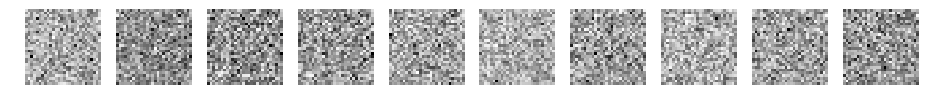

-- Iteration:500
  d_error: 0.08035339415073395
  g_error: 4.573095321655273


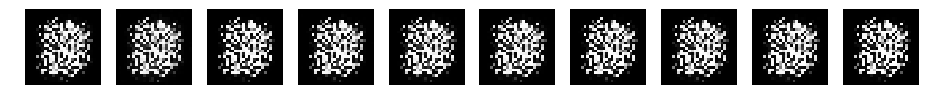

-- Iteration:1000
  d_error: 0.04854150116443634
  g_error: 6.7125935554504395


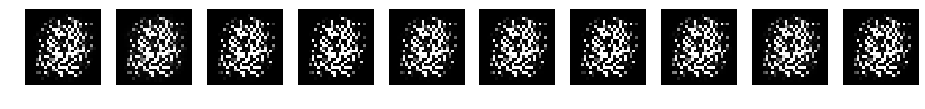

-- Iteration:1500
  d_error: 0.0731448158621788
  g_error: 12.464506149291992


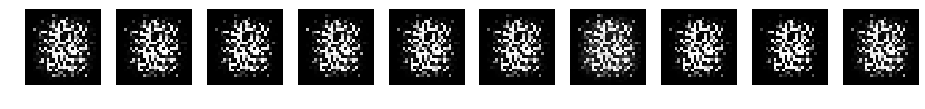

-- Iteration:2000
  d_error: 0.049164779484272
  g_error: 5.188045501708984


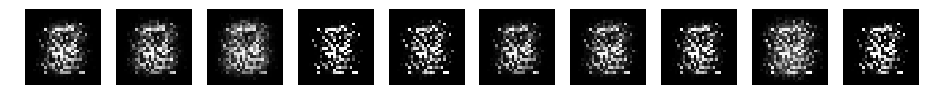

-- Iteration:2500
  d_error: 0.04351118952035904
  g_error: 4.1911420822143555


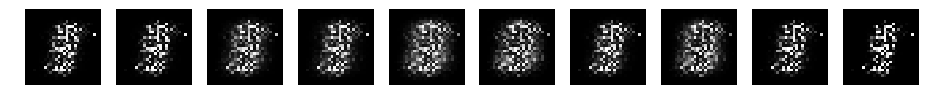

-- Iteration:3000
  d_error: 0.05097251385450363
  g_error: 4.108644485473633


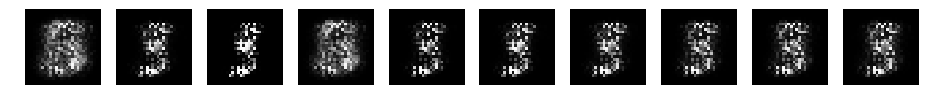

-- Iteration:3500
  d_error: 0.09538233280181885
  g_error: 4.536709785461426


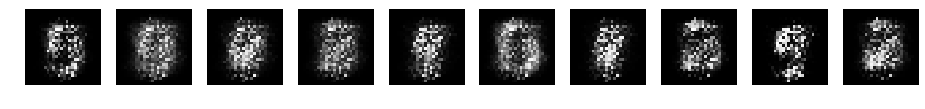

-- Iteration:4000
  d_error: 0.19977349042892456
  g_error: 3.872485637664795


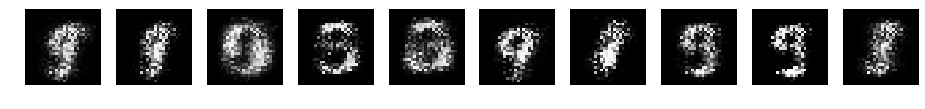

-- Iteration:4500
  d_error: 0.1825314164161682
  g_error: 4.095119953155518


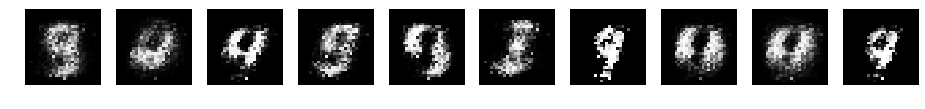

-- Iteration:5000
  d_error: 0.1846502721309662
  g_error: 3.629556894302368


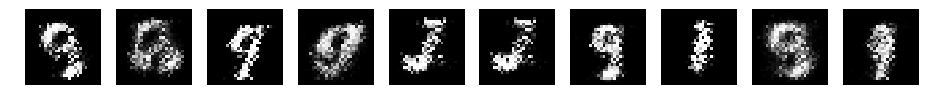

-- Iteration:5500
  d_error: 0.15089382231235504
  g_error: 4.054407119750977


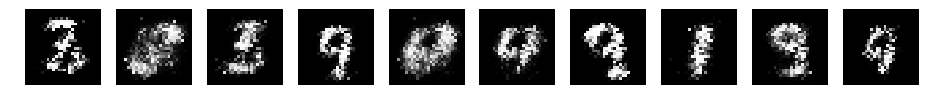

-- Iteration:6000
  d_error: 0.10294784605503082
  g_error: 4.7190070152282715


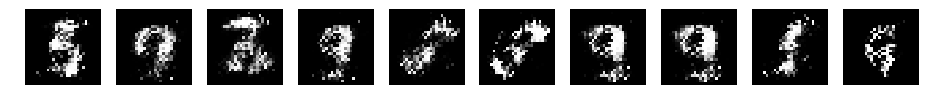

-- Iteration:6500
  d_error: 0.09067128598690033
  g_error: 4.064584732055664


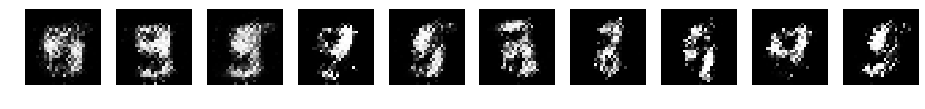

-- Iteration:7000
  d_error: 0.18645283579826355
  g_error: 4.412707328796387


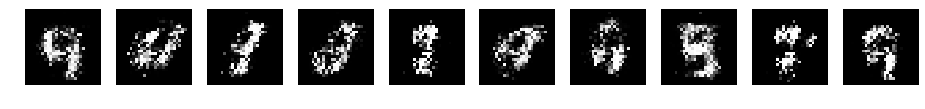

-- Iteration:7500
  d_error: 0.1853121519088745
  g_error: 4.607617378234863


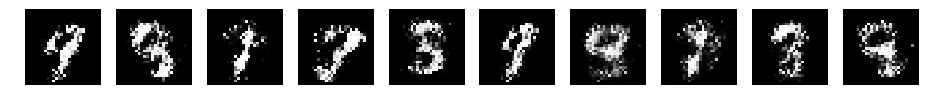

-- Iteration:8000
  d_error: 0.12636736035346985
  g_error: 4.691166877746582


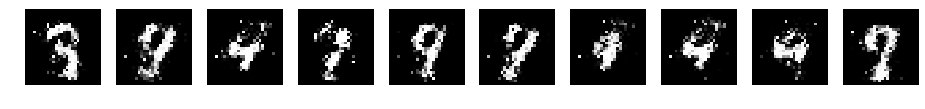

-- Iteration:8500
  d_error: 0.31592756509780884
  g_error: 3.966425657272339


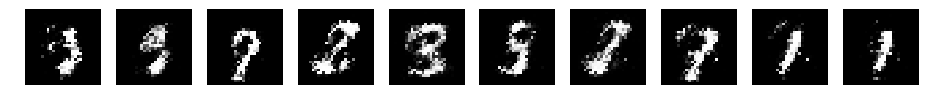

-- Iteration:9000
  d_error: 0.29313787817955017
  g_error: 3.688516139984131


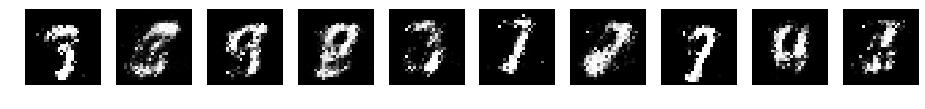

-- Iteration:9500
  d_error: 0.5898629426956177
  g_error: 4.140732288360596


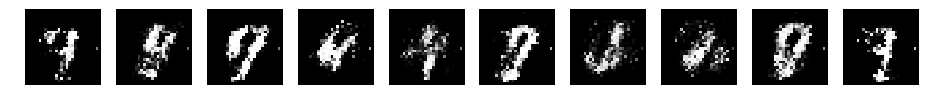

-- Iteration:10000
  d_error: 0.2827013432979584
  g_error: 3.5541651248931885


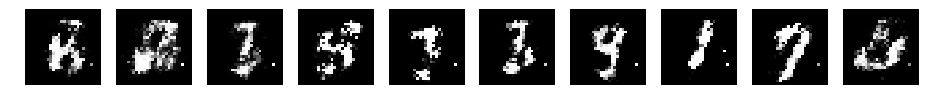

-- Iteration:10500
  d_error: 0.29348599910736084
  g_error: 4.271008491516113


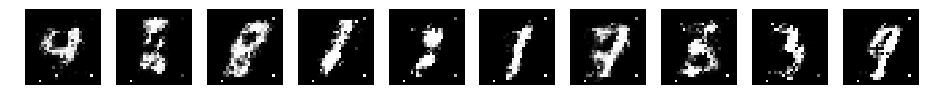

-- Iteration:11000
  d_error: 0.3091582953929901
  g_error: 3.763939380645752


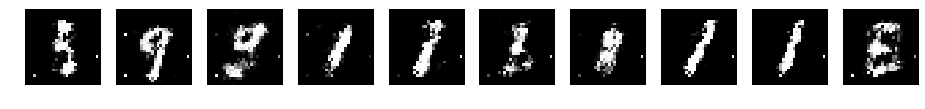

-- Iteration:11500
  d_error: 0.12937600910663605
  g_error: 4.035403251647949


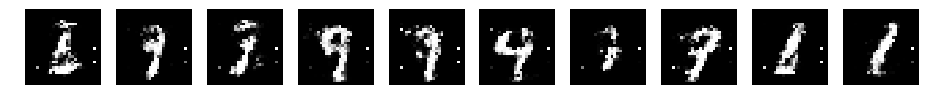

-- Iteration:12000
  d_error: 0.34319397807121277
  g_error: 3.693634510040283


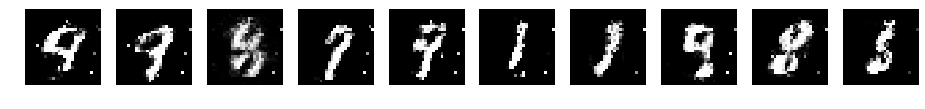

-- Iteration:12500
  d_error: 0.3626059293746948
  g_error: 3.1400210857391357


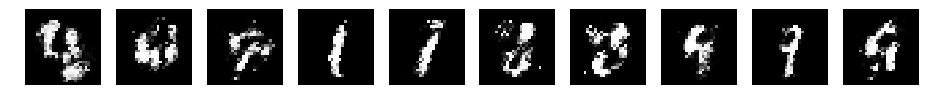

-- Iteration:13000
  d_error: 0.3857782483100891
  g_error: 3.153005599975586


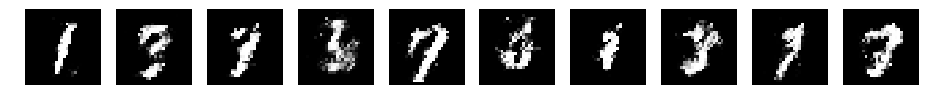

-- Iteration:13500
  d_error: 0.32079654932022095
  g_error: 4.142125606536865


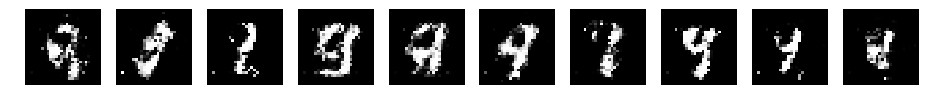

-- Iteration:14000
  d_error: 0.404218852519989
  g_error: 3.590580940246582


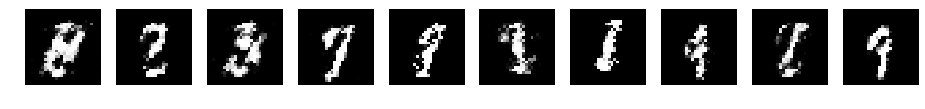

-- Iteration:14500
  d_error: 0.5261394381523132
  g_error: 3.3594472408294678


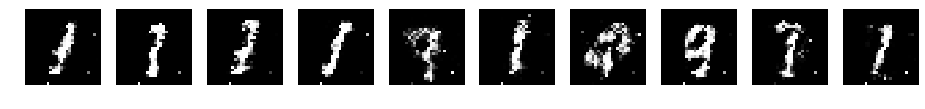

-- Iteration:15000
  d_error: 0.706939697265625
  g_error: 2.7229933738708496


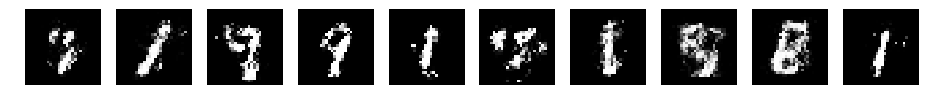

-- Iteration:15500
  d_error: 0.6015558242797852
  g_error: 3.057124376296997


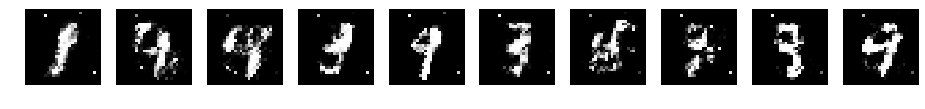

-- Iteration:16000
  d_error: 0.590244472026825
  g_error: 3.0386319160461426


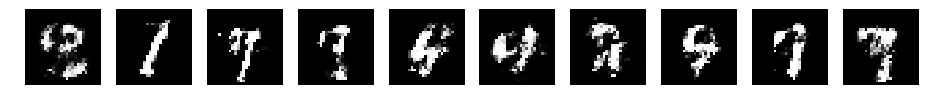

-- Iteration:16500
  d_error: 0.5745326280593872
  g_error: 2.7464075088500977


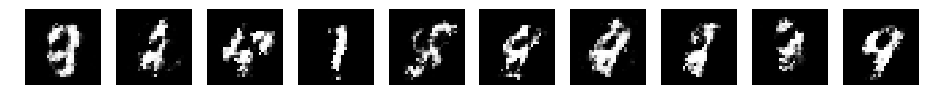

-- Iteration:17000
  d_error: 0.4196477234363556
  g_error: 2.7609620094299316


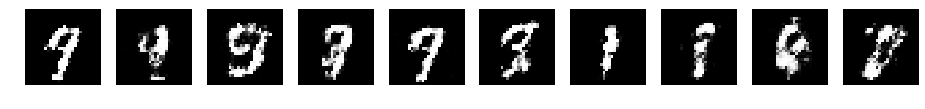

-- Iteration:17500
  d_error: 0.43144911527633667
  g_error: 3.1378774642944336


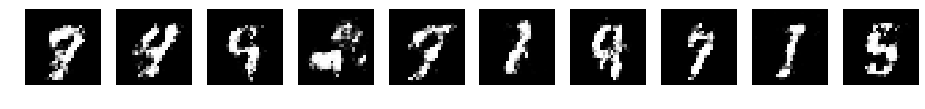

-- Iteration:18000
  d_error: 0.3158806562423706
  g_error: 3.9431023597717285


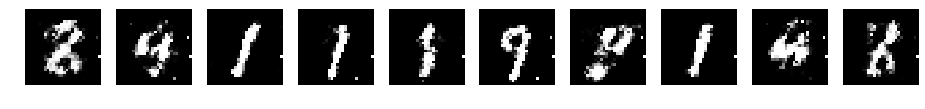

-- Iteration:18500
  d_error: 0.3748128414154053
  g_error: 3.4116344451904297


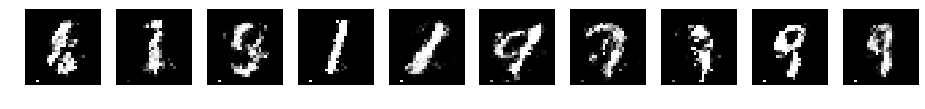

-- Iteration:19000
  d_error: 0.4882923662662506
  g_error: 2.745344638824463


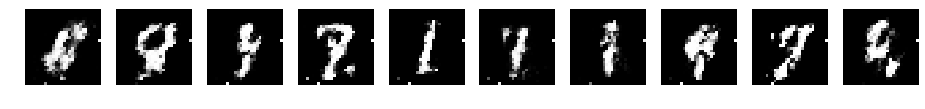

-- Iteration:19500
  d_error: 0.5182032585144043
  g_error: 2.949575662612915


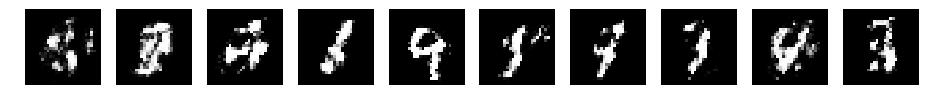

-- Iteration:20000
  d_error: 0.47961658239364624
  g_error: 2.8907365798950195


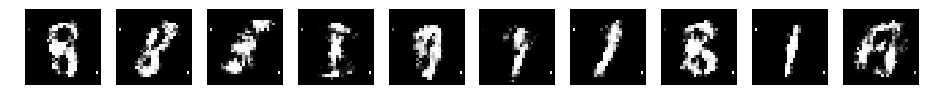

-- Iteration:20500
  d_error: 0.6560988426208496
  g_error: 2.383854627609253


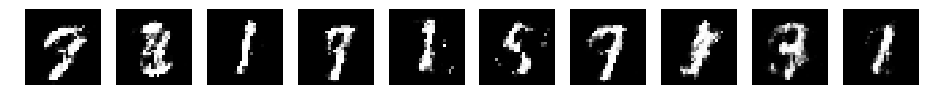

-- Iteration:21000
  d_error: 0.5874998569488525
  g_error: 2.5925707817077637


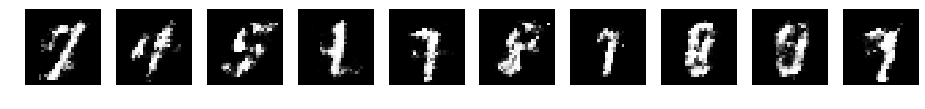

-- Iteration:21500
  d_error: 0.4867026209831238
  g_error: 2.4885566234588623


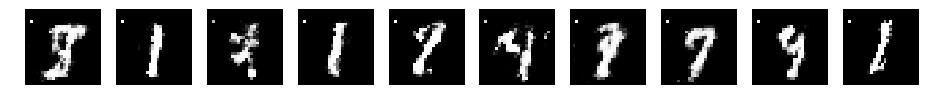

-- Iteration:22000
  d_error: 0.3770577311515808
  g_error: 2.745755672454834


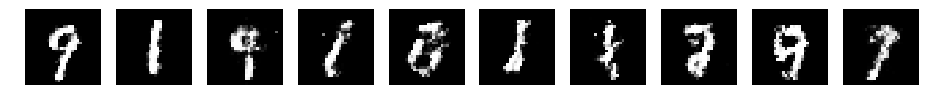

-- Iteration:22500
  d_error: 0.6664213538169861
  g_error: 2.6663124561309814


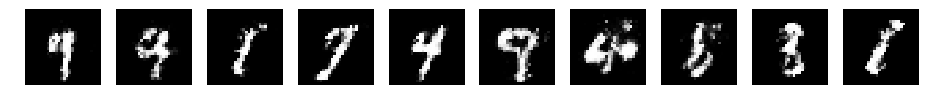

-- Iteration:23000
  d_error: 0.7378228902816772
  g_error: 2.7670884132385254


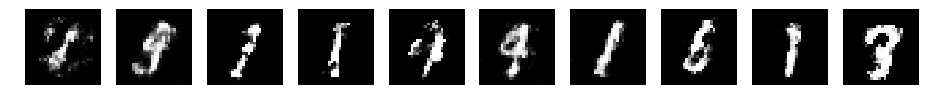

-- Iteration:23500
  d_error: 0.5014575719833374
  g_error: 2.6293582916259766


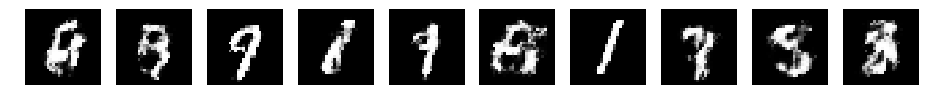

-- Iteration:24000
  d_error: 0.6657999753952026
  g_error: 2.4382805824279785


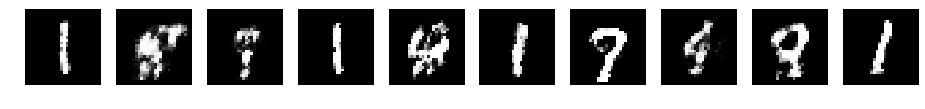

-- Iteration:24500
  d_error: 0.6002873182296753
  g_error: 2.1421844959259033


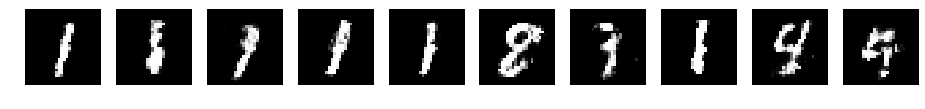

-- Iteration:25000
  d_error: 0.7278532981872559
  g_error: 2.3605546951293945


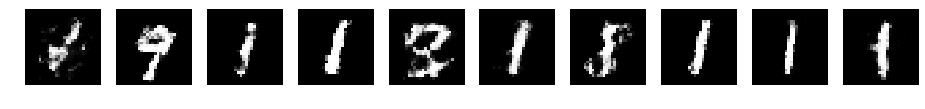

-- Iteration:25500
  d_error: 0.6366552114486694
  g_error: 2.113572120666504


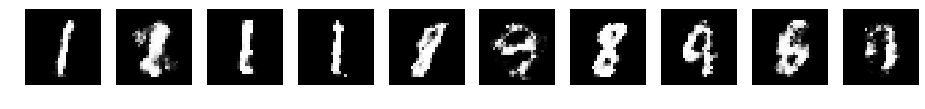

-- Iteration:26000
  d_error: 0.43207526206970215
  g_error: 2.6244726181030273


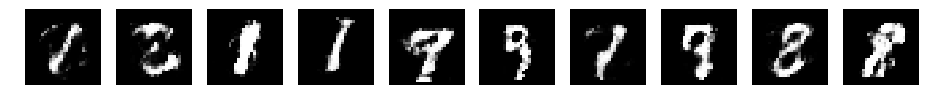

-- Iteration:26500
  d_error: 0.5925740003585815
  g_error: 2.4189319610595703


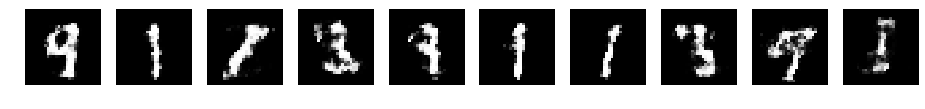

-- Iteration:27000
  d_error: 0.598222553730011
  g_error: 2.6832542419433594


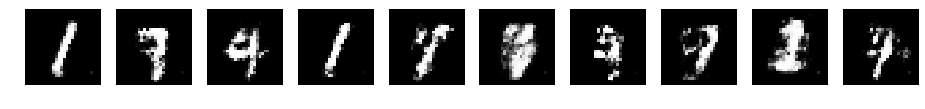

-- Iteration:27500
  d_error: 0.6517877578735352
  g_error: 2.6430118083953857


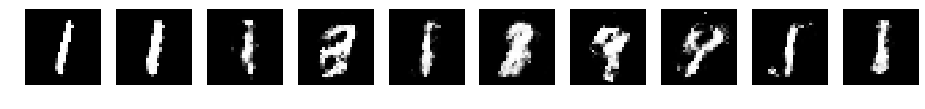

-- Iteration:28000
  d_error: 0.5896955132484436
  g_error: 2.698981761932373


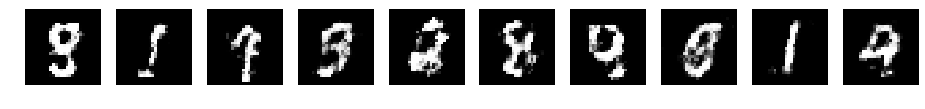

-- Iteration:28500
  d_error: 0.6442524194717407
  g_error: 2.6195693016052246


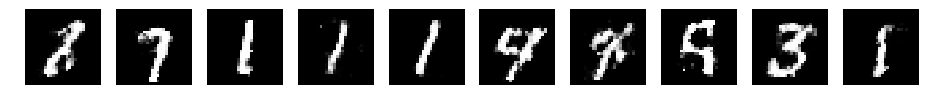

-- Iteration:29000
  d_error: 0.703743577003479
  g_error: 2.51051926612854


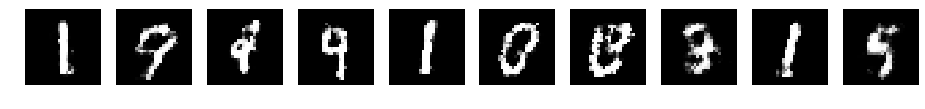

-- Iteration:29500
  d_error: 0.5874509811401367
  g_error: 2.513606309890747


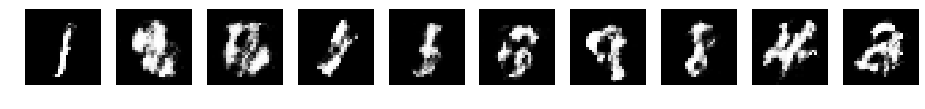

-- Iteration:30000
  d_error: 0.5995516777038574
  g_error: 2.533592939376831


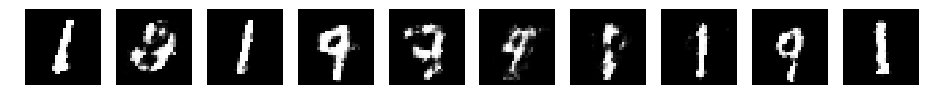

-- Iteration:30500
  d_error: 0.6332592964172363
  g_error: 2.529245615005493


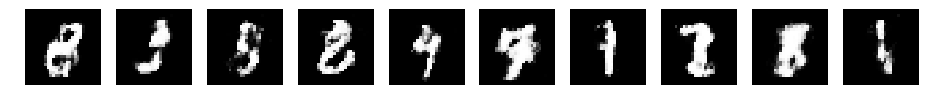

-- Iteration:31000
  d_error: 0.7219971418380737
  g_error: 2.1816506385803223


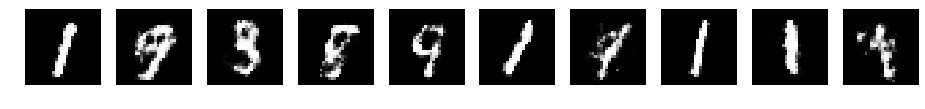

-- Iteration:31500
  d_error: 0.7144419550895691
  g_error: 2.4865124225616455


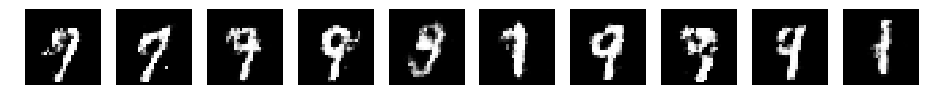

-- Iteration:32000
  d_error: 0.531139075756073
  g_error: 2.1326651573181152


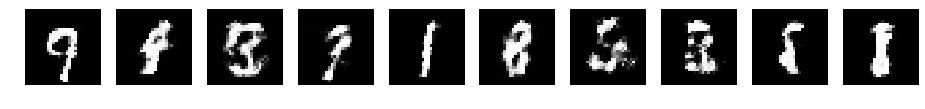

-- Iteration:32500
  d_error: 0.460286408662796
  g_error: 2.415070056915283


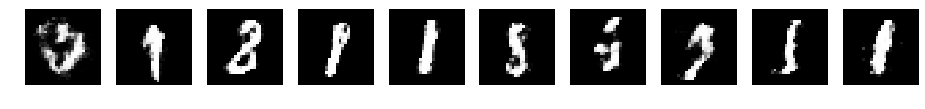

-- Iteration:33000
  d_error: 0.6679311990737915
  g_error: 2.4120583534240723


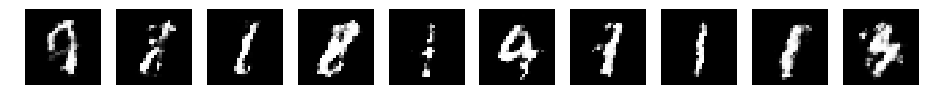

-- Iteration:33500
  d_error: 0.467632919549942
  g_error: 2.240755558013916


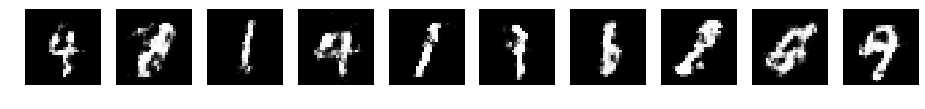

-- Iteration:34000
  d_error: 0.699881911277771
  g_error: 2.281926393508911


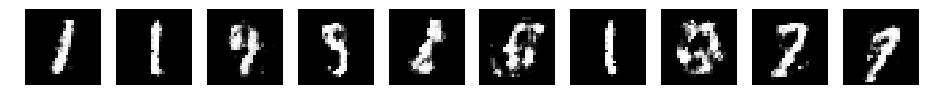

-- Iteration:34500
  d_error: 0.5949803590774536
  g_error: 2.2065348625183105


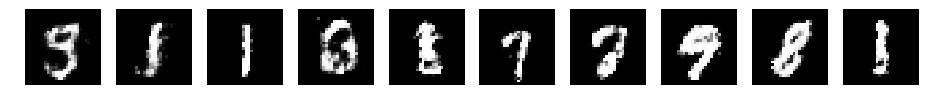

-- Iteration:35000
  d_error: 0.765442967414856
  g_error: 1.9992308616638184


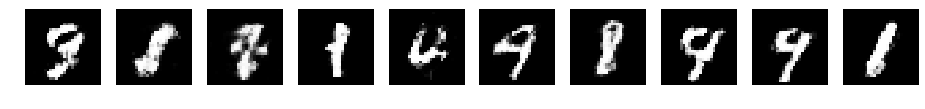

-- Iteration:35500
  d_error: 0.6217896938323975
  g_error: 2.4255013465881348


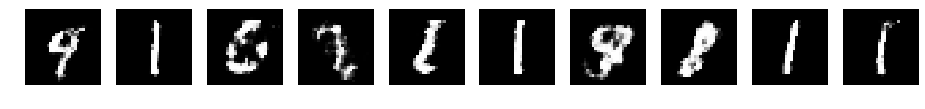

-- Iteration:36000
  d_error: 0.6315505504608154
  g_error: 2.3464813232421875


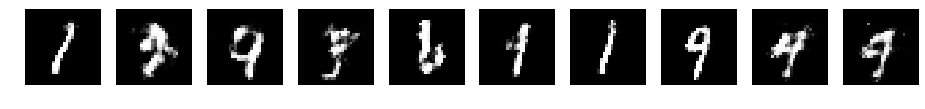

-- Iteration:36500
  d_error: 0.6405919790267944
  g_error: 2.3548264503479004


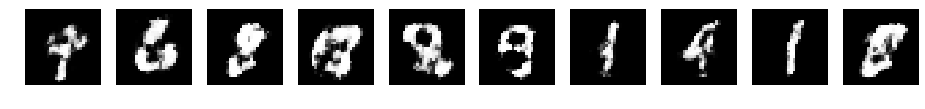

-- Iteration:37000
  d_error: 0.5566682815551758
  g_error: 2.3340377807617188


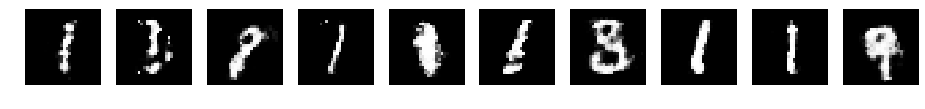

-- Iteration:37500
  d_error: 0.7083019018173218
  g_error: 2.5994911193847656


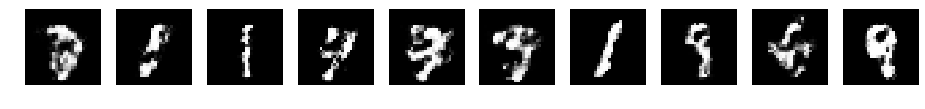

-- Iteration:38000
  d_error: 0.6811745166778564
  g_error: 2.1163296699523926


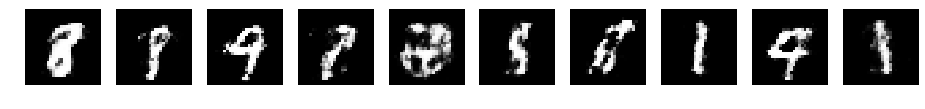

-- Iteration:38500
  d_error: 0.5752788782119751
  g_error: 2.4378557205200195


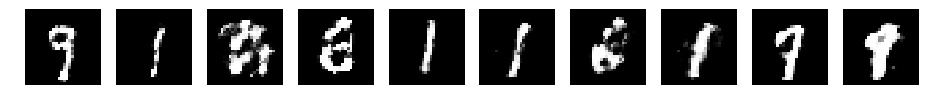

-- Iteration:39000
  d_error: 0.4872499704360962
  g_error: 2.6110920906066895


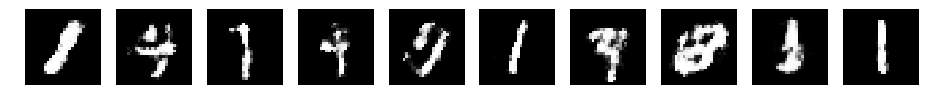

-- Iteration:39500
  d_error: 0.59596848487854
  g_error: 2.377283811569214


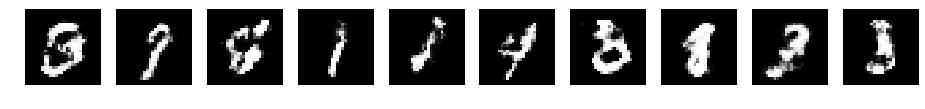

-- Iteration:40000
  d_error: 0.5975809097290039
  g_error: 2.1513969898223877


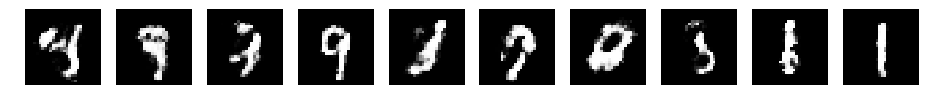

-- Iteration:40500
  d_error: 0.5964823961257935
  g_error: 2.527708053588867


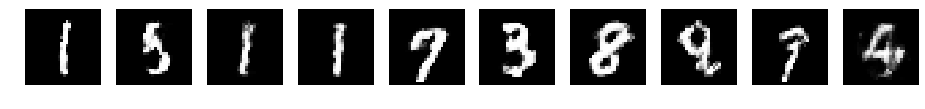

-- Iteration:41000
  d_error: 0.5747163891792297
  g_error: 2.5602657794952393


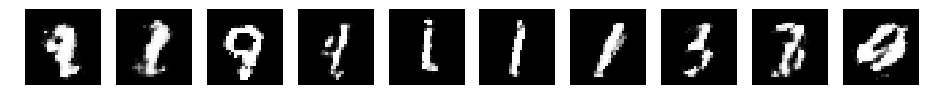

-- Iteration:41500
  d_error: 0.5343179702758789
  g_error: 2.3978047370910645


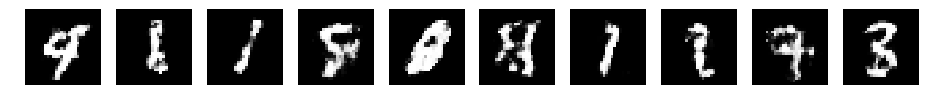

-- Iteration:42000
  d_error: 0.6223856210708618
  g_error: 2.319835662841797


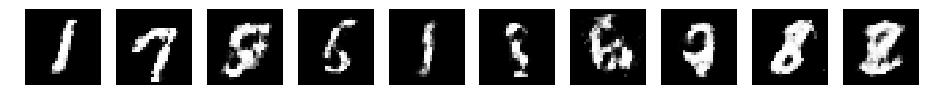

-- Iteration:42500
  d_error: 0.594308614730835
  g_error: 1.9961490631103516


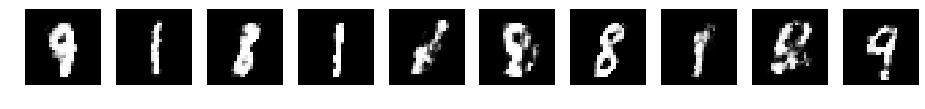

-- Iteration:43000
  d_error: 0.6677165627479553
  g_error: 2.305692434310913


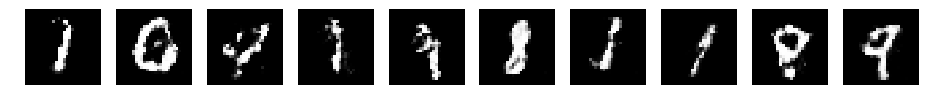

-- Iteration:43500
  d_error: 0.5156092047691345
  g_error: 2.550948143005371


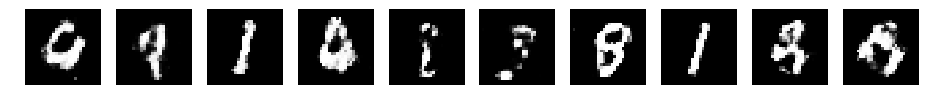

-- Iteration:44000
  d_error: 0.5369462966918945
  g_error: 2.314389944076538


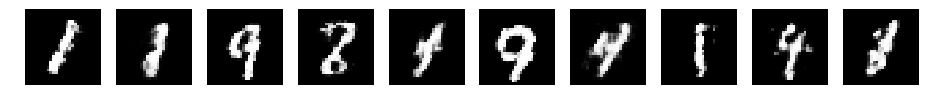

-- Iteration:44500
  d_error: 0.8012294769287109
  g_error: 2.4485726356506348


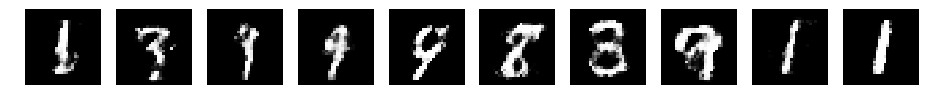

-- Iteration:45000
  d_error: 0.5862343311309814
  g_error: 2.1473169326782227


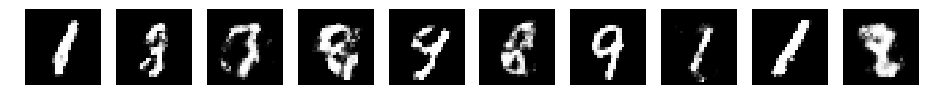

-- Iteration:45500
  d_error: 0.6040102243423462
  g_error: 2.3316593170166016


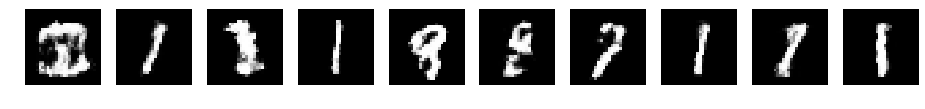

-- Iteration:46000
  d_error: 0.5930877923965454
  g_error: 2.4143335819244385


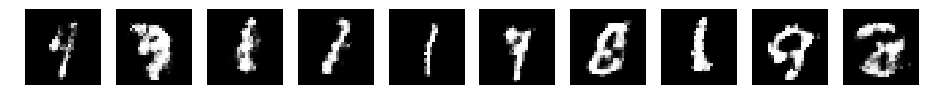

-- Iteration:46500
  d_error: 0.5077221393585205
  g_error: 2.714042901992798


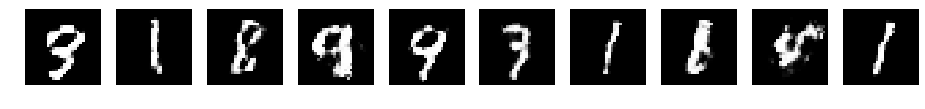

-- Iteration:47000
  d_error: 0.43050745129585266
  g_error: 2.4559216499328613


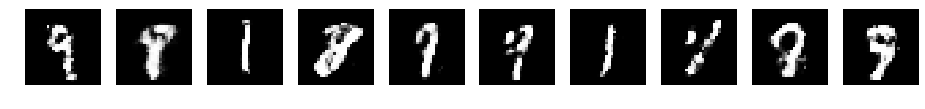

-- Iteration:47500
  d_error: 0.6380380392074585
  g_error: 2.1408214569091797


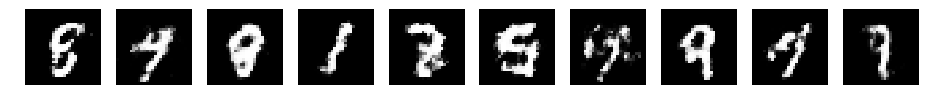

-- Iteration:48000
  d_error: 0.5061395168304443
  g_error: 2.562265396118164


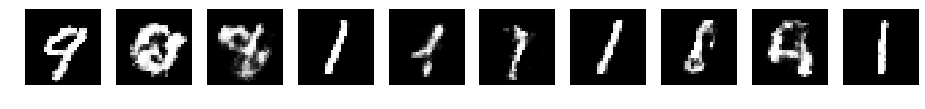

-- Iteration:48500
  d_error: 0.5921664237976074
  g_error: 2.273927688598633


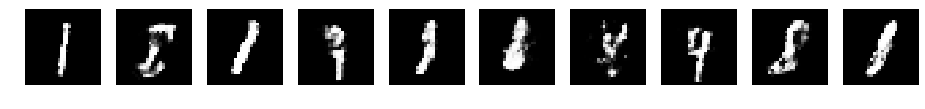

-- Iteration:49000
  d_error: 0.5222292542457581
  g_error: 2.3344242572784424


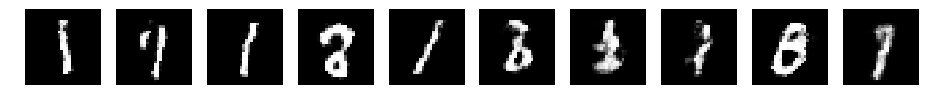

-- Iteration:49500
  d_error: 0.49066320061683655
  g_error: 2.341593027114868


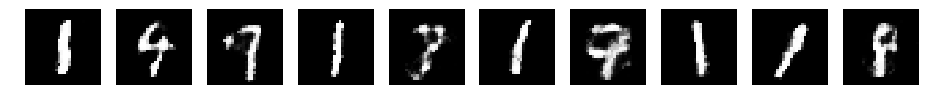

-- Iteration:50000
  d_error: 0.6846212148666382
  g_error: 2.307701826095581


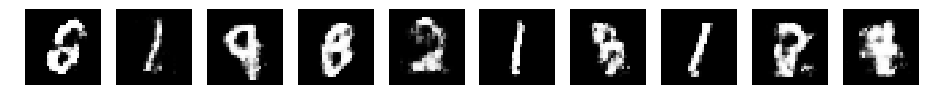

-- Iteration:50500
  d_error: 0.6364186406135559
  g_error: 2.608458995819092


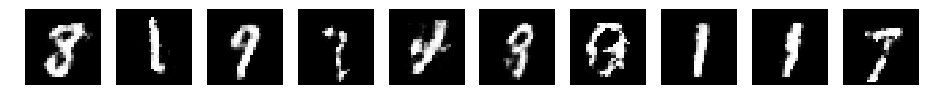

-- Iteration:51000
  d_error: 0.5530833005905151
  g_error: 2.2024967670440674


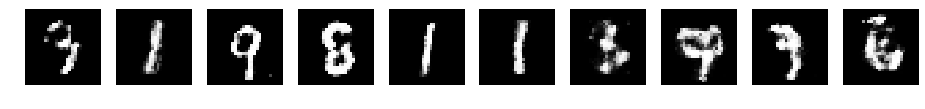

-- Iteration:51500
  d_error: 0.5033504366874695
  g_error: 2.7725415229797363


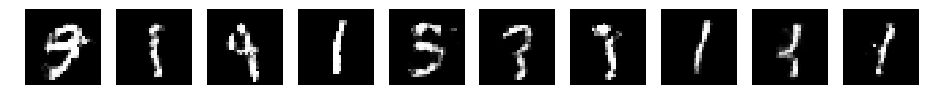

-- Iteration:52000
  d_error: 0.5096102952957153
  g_error: 2.679574966430664


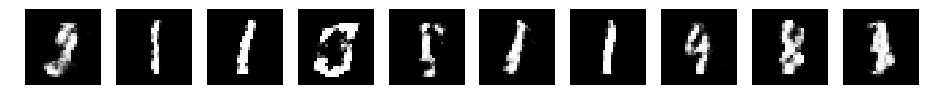

-- Iteration:52500
  d_error: 0.45363467931747437
  g_error: 2.381394386291504


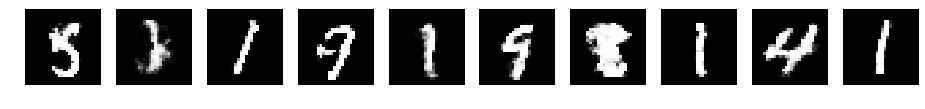

-- Iteration:53000
  d_error: 0.6981697082519531
  g_error: 2.489027976989746


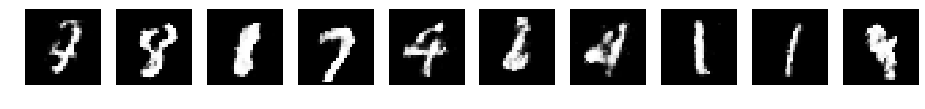

-- Iteration:53500
  d_error: 0.6488152742385864
  g_error: 2.506269693374634


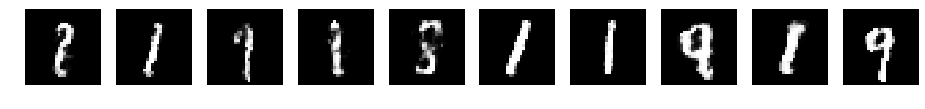

-- Iteration:54000
  d_error: 0.5285664796829224
  g_error: 2.6952285766601562


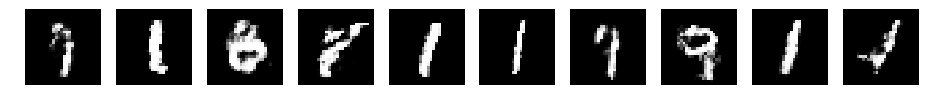

-- Iteration:54500
  d_error: 0.4390808939933777
  g_error: 2.6585214138031006


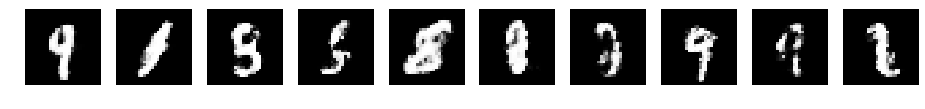

-- Iteration:55000
  d_error: 0.5682334899902344
  g_error: 2.2727766036987305


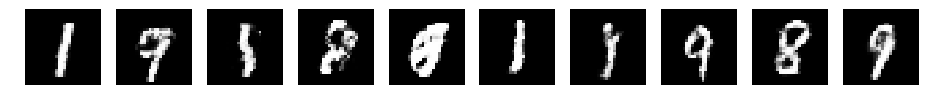

-- Iteration:55500
  d_error: 0.567962646484375
  g_error: 2.071237087249756


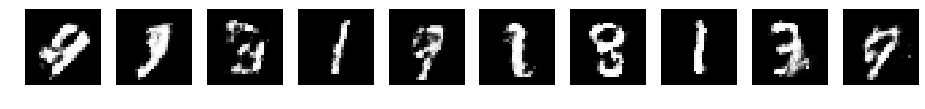

-- Iteration:56000
  d_error: 0.5427024960517883
  g_error: 2.6420083045959473


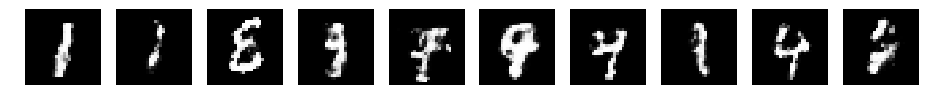

-- Iteration:56500
  d_error: 0.6878551244735718
  g_error: 2.2790751457214355


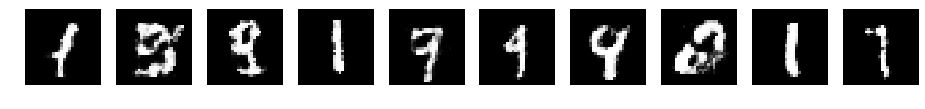

-- Iteration:57000
  d_error: 0.5233311057090759
  g_error: 2.3173232078552246


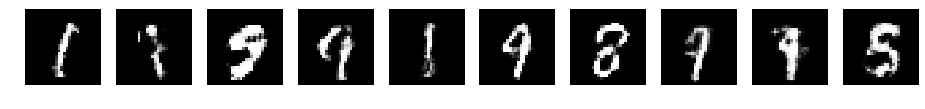

-- Iteration:57500
  d_error: 0.5089905858039856
  g_error: 2.838852643966675


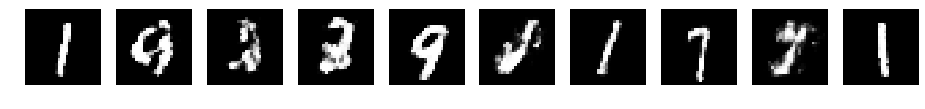

-- Iteration:58000
  d_error: 0.5749938488006592
  g_error: 2.3738346099853516


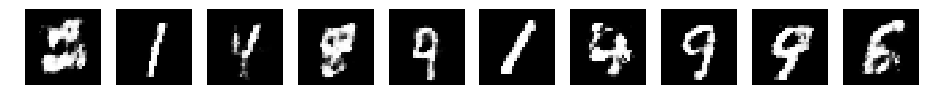

-- Iteration:58500
  d_error: 0.45900267362594604
  g_error: 2.3937034606933594


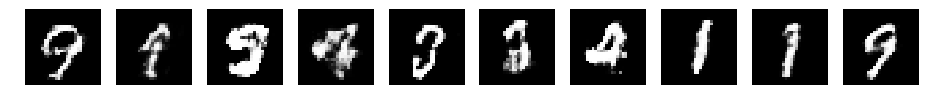

-- Iteration:59000
  d_error: 0.64327073097229
  g_error: 2.6272807121276855


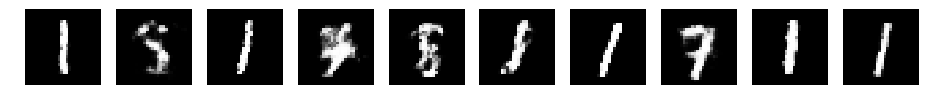

-- Iteration:59500
  d_error: 0.49522820115089417
  g_error: 2.759855270385742


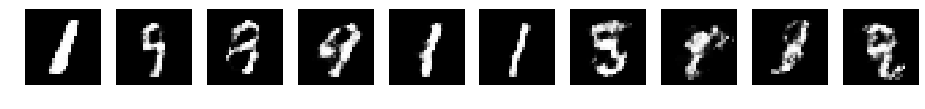

-- Iteration:60000
  d_error: 0.65003502368927
  g_error: 2.3158986568450928


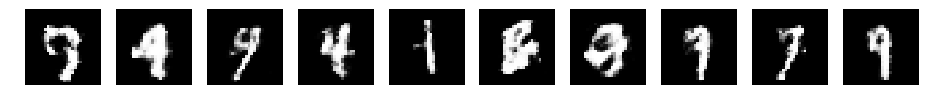

-- Iteration:60500
  d_error: 0.6118096113204956
  g_error: 2.3436334133148193


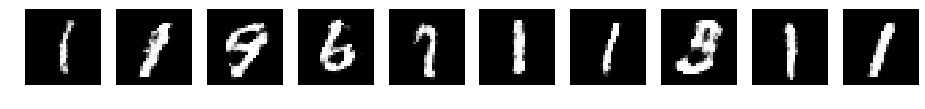

-- Iteration:61000
  d_error: 0.6528692245483398
  g_error: 2.5529465675354004


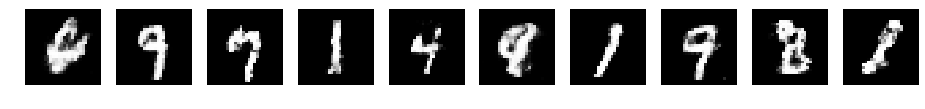

-- Iteration:61500
  d_error: 0.4758995771408081
  g_error: 2.6679847240448


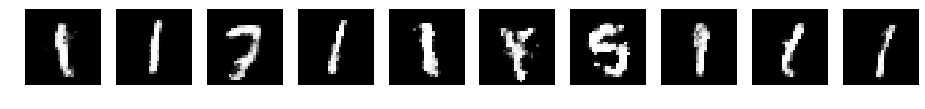

-- Iteration:62000
  d_error: 0.5039563775062561
  g_error: 2.494866132736206


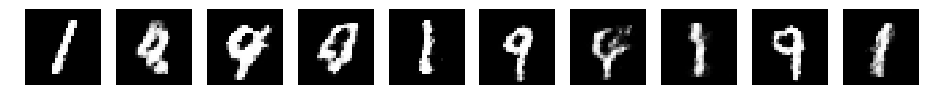

-- Iteration:62500
  d_error: 0.5066198706626892
  g_error: 2.506025552749634


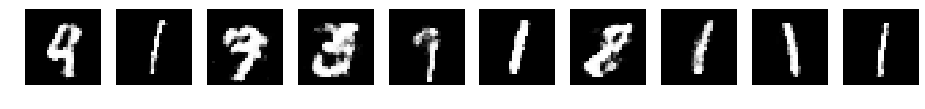

-- Iteration:63000
  d_error: 0.5926995277404785
  g_error: 2.6269593238830566


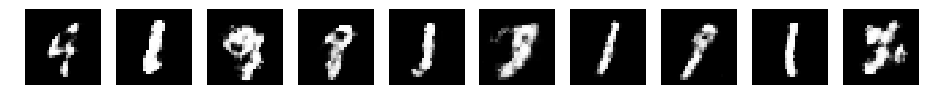

-- Iteration:63500
  d_error: 0.6854526996612549
  g_error: 2.223200798034668


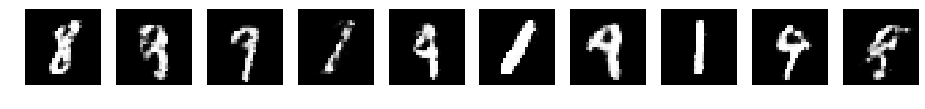

-- Iteration:64000
  d_error: 0.49094080924987793
  g_error: 2.62522554397583


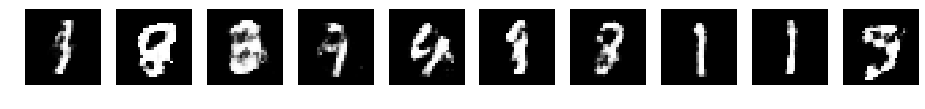

-- Iteration:64500
  d_error: 0.5801073312759399
  g_error: 2.5678369998931885


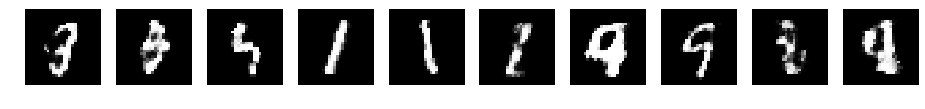

-- Iteration:65000
  d_error: 0.45585522055625916
  g_error: 2.48777174949646


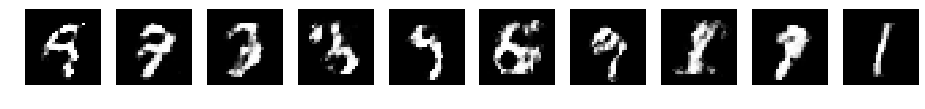

-- Iteration:65500
  d_error: 0.6958386898040771
  g_error: 2.8689093589782715


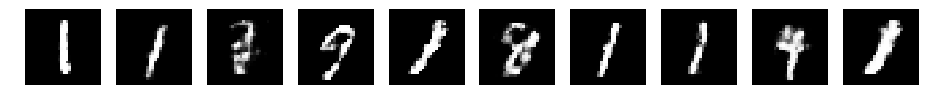

-- Iteration:66000
  d_error: 0.4593867361545563
  g_error: 2.4780497550964355


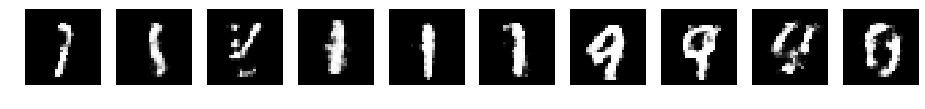

-- Iteration:66500
  d_error: 0.45809149742126465
  g_error: 2.3575901985168457


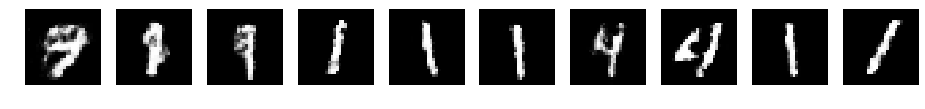

-- Iteration:67000
  d_error: 0.43106403946876526
  g_error: 2.6111903190612793


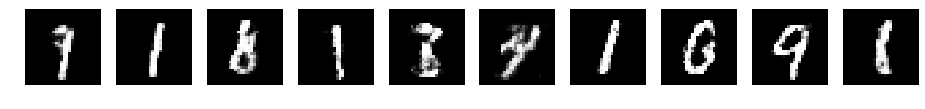

-- Iteration:67500
  d_error: 0.5395023822784424
  g_error: 2.721033811569214


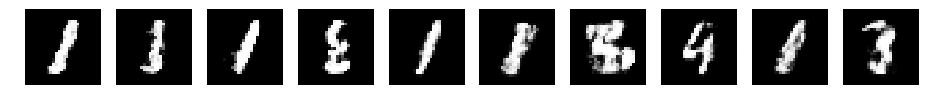

-- Iteration:68000
  d_error: 0.5635732412338257
  g_error: 2.930500030517578


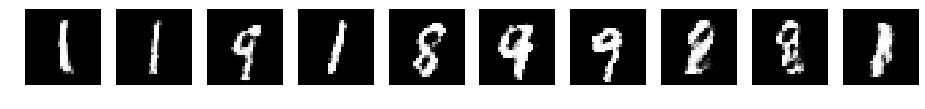

-- Iteration:68500
  d_error: 0.5365267992019653
  g_error: 2.6506996154785156


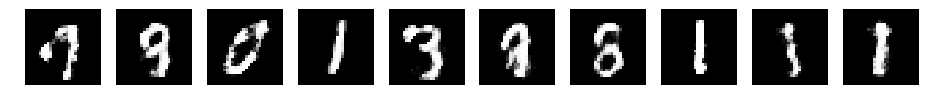

-- Iteration:69000
  d_error: 0.329995721578598
  g_error: 3.0954113006591797


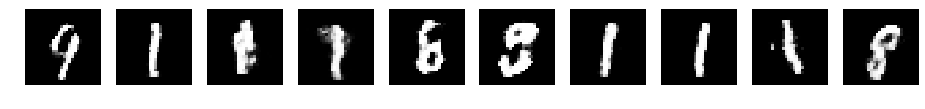

-- Iteration:69500
  d_error: 0.5448743104934692
  g_error: 2.7641360759735107


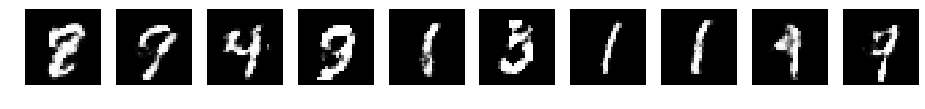

-- Iteration:70000
  d_error: 0.5598746538162231
  g_error: 2.1743886470794678


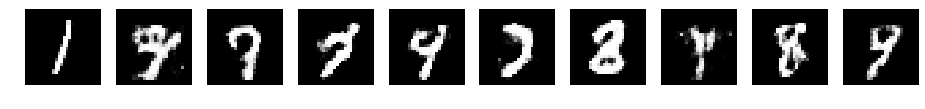

-- Iteration:70500
  d_error: 0.5318020582199097
  g_error: 3.079216480255127


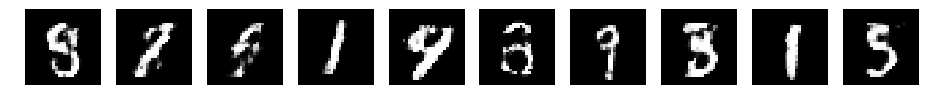

-- Iteration:71000
  d_error: 0.4501461684703827
  g_error: 2.338630199432373


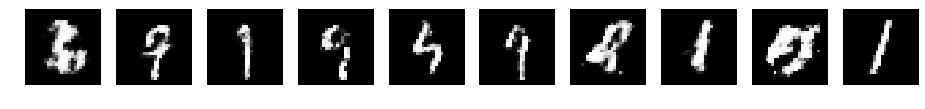

-- Iteration:71500
  d_error: 0.7070744037628174
  g_error: 2.6122541427612305


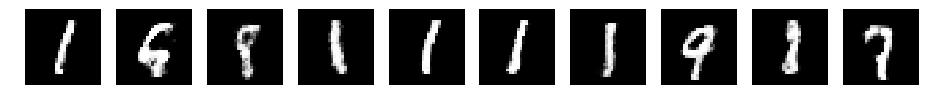

-- Iteration:72000
  d_error: 0.6385063529014587
  g_error: 2.5056357383728027


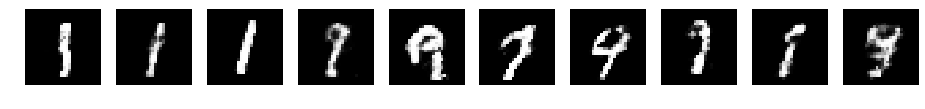

-- Iteration:72500
  d_error: 0.38462793827056885
  g_error: 2.705240249633789


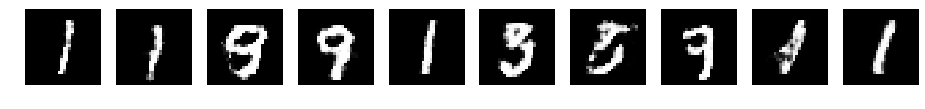

-- Iteration:73000
  d_error: 0.44608306884765625
  g_error: 2.746772050857544


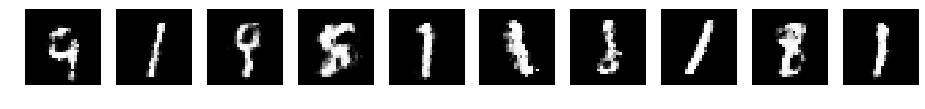

-- Iteration:73500
  d_error: 0.4891442060470581
  g_error: 2.530390977859497


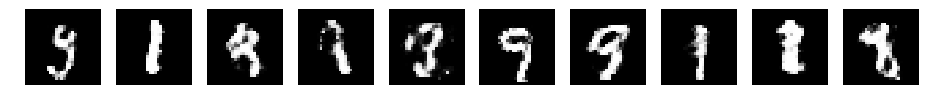

-- Iteration:74000
  d_error: 0.6785565614700317
  g_error: 2.4879491329193115


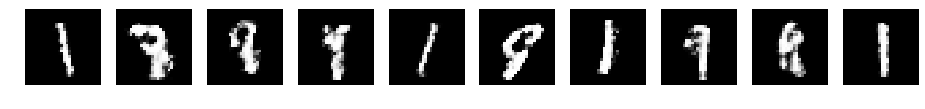

-- Iteration:74500
  d_error: 0.5158833265304565
  g_error: 2.285492420196533


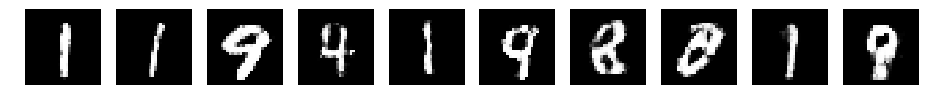

-- Iteration:75000
  d_error: 0.5534236431121826
  g_error: 2.6039228439331055


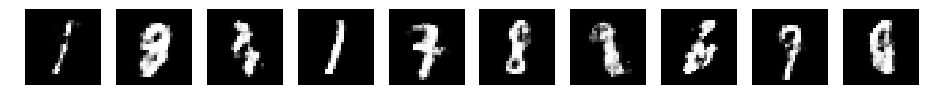

-- Iteration:75500
  d_error: 0.5189526677131653
  g_error: 2.2633895874023438


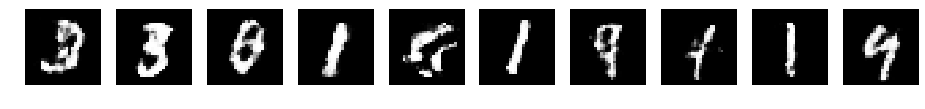

-- Iteration:76000
  d_error: 0.6273370981216431
  g_error: 2.2256438732147217


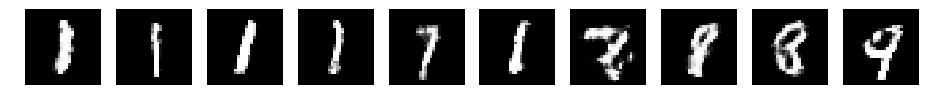

-- Iteration:76500
  d_error: 0.5235726237297058
  g_error: 2.4491071701049805


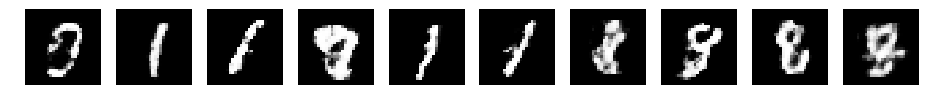

-- Iteration:77000
  d_error: 0.4340116083621979
  g_error: 2.3114185333251953


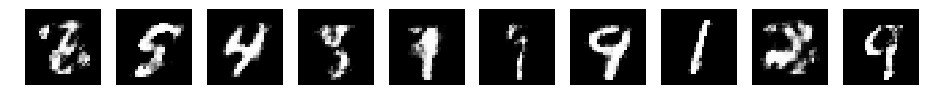

-- Iteration:77500
  d_error: 0.654089093208313
  g_error: 2.895028591156006


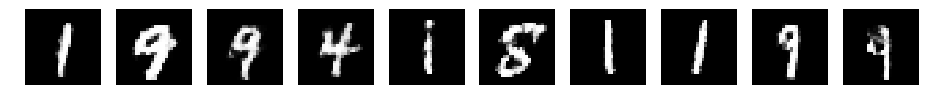

-- Iteration:78000
  d_error: 0.5253101587295532
  g_error: 2.853318452835083


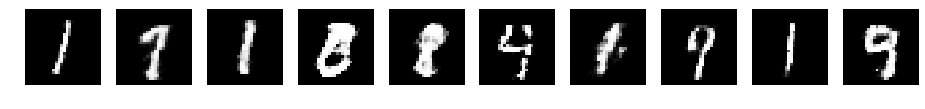

-- Iteration:78500
  d_error: 0.5126036405563354
  g_error: 2.4281275272369385


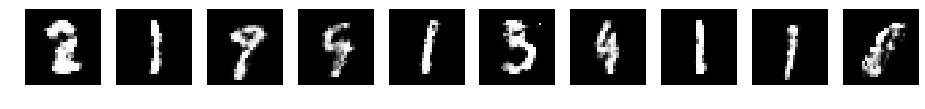

-- Iteration:79000
  d_error: 0.6252526044845581
  g_error: 2.6921093463897705


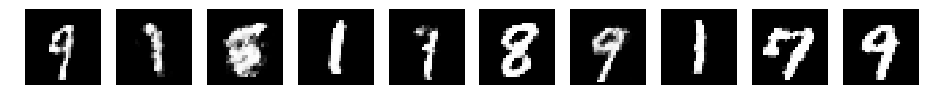

-- Iteration:79500
  d_error: 0.5517103672027588
  g_error: 2.627676486968994


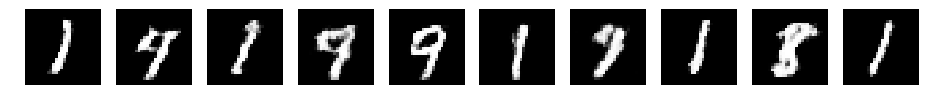

-- Iteration:80000
  d_error: 0.6432221531867981
  g_error: 2.7095727920532227


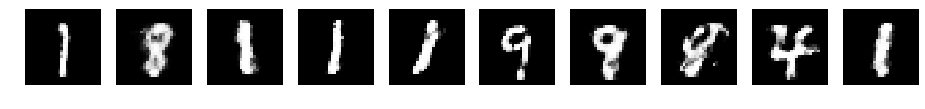

-- Iteration:80500
  d_error: 0.44749540090560913
  g_error: 2.6777048110961914


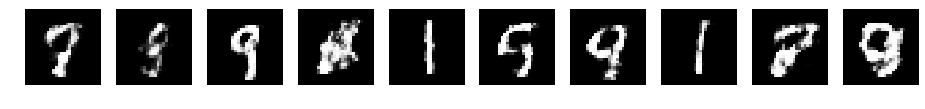

-- Iteration:81000
  d_error: 0.4620032012462616
  g_error: 2.9381601810455322


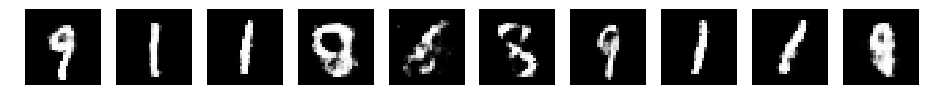

-- Iteration:81500
  d_error: 0.5288804769515991
  g_error: 2.6093499660491943


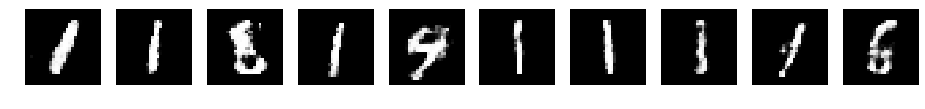

-- Iteration:82000
  d_error: 0.44451987743377686
  g_error: 2.6437978744506836


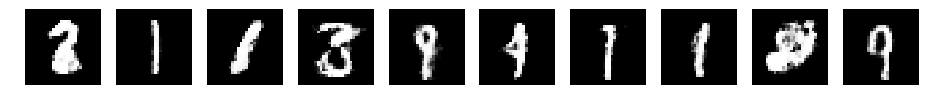

-- Iteration:82500
  d_error: 0.5838443040847778
  g_error: 2.4601306915283203


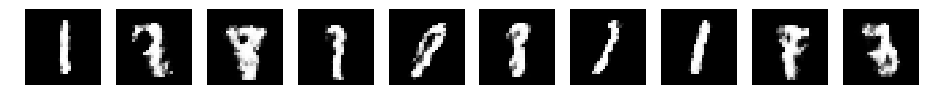

-- Iteration:83000
  d_error: 0.43623465299606323
  g_error: 2.8032054901123047


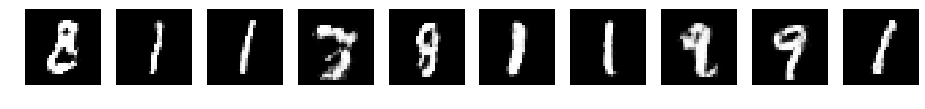

-- Iteration:83500
  d_error: 0.6184384822845459
  g_error: 2.7561984062194824


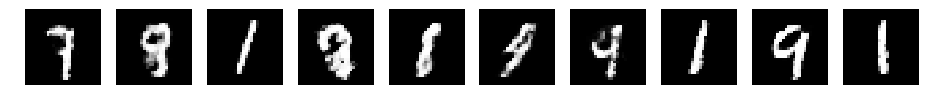

-- Iteration:84000
  d_error: 0.4112941324710846
  g_error: 2.7612621784210205


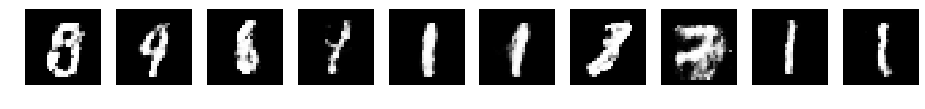

-- Iteration:84500
  d_error: 0.4575723707675934
  g_error: 2.77176833152771


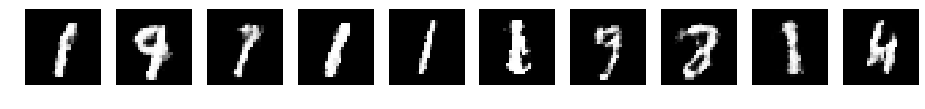

-- Iteration:85000
  d_error: 0.4850940704345703
  g_error: 2.612837314605713


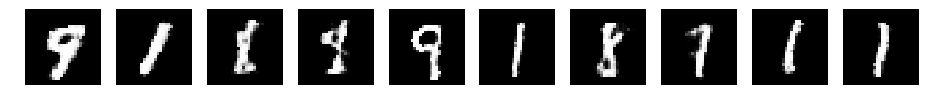

-- Iteration:85500
  d_error: 0.5377970933914185
  g_error: 2.691584348678589


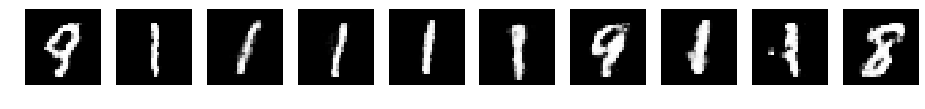

-- Iteration:86000
  d_error: 0.5289038419723511
  g_error: 2.7345657348632812


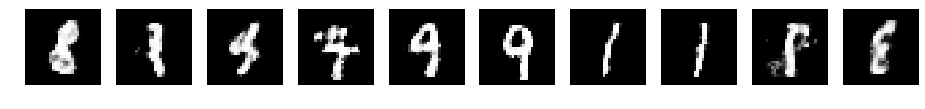

-- Iteration:86500
  d_error: 0.6043530106544495
  g_error: 2.528763771057129


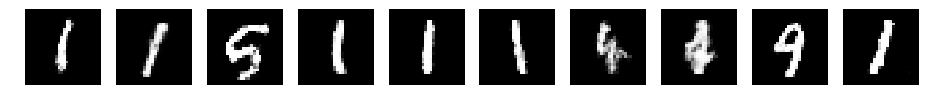

-- Iteration:87000
  d_error: 0.42824694514274597
  g_error: 2.34266996383667


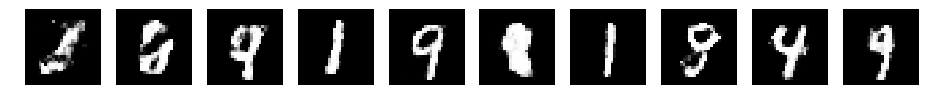

-- Iteration:87500
  d_error: 0.5203981399536133
  g_error: 2.593374729156494


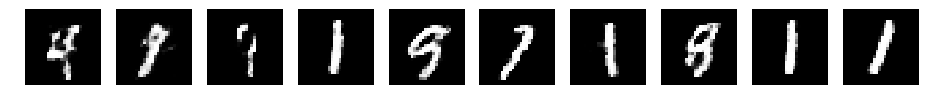

-- Iteration:88000
  d_error: 0.44360631704330444
  g_error: 2.3984198570251465


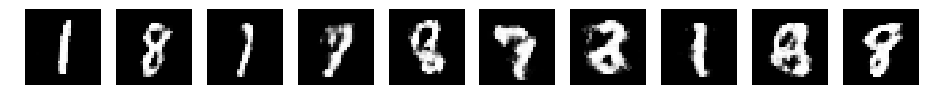

-- Iteration:88500
  d_error: 0.6162195205688477
  g_error: 3.1246347427368164


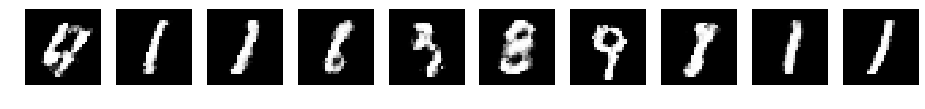

-- Iteration:89000
  d_error: 0.4319090247154236
  g_error: 2.7774972915649414


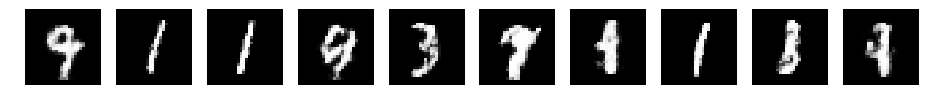

-- Iteration:89500
  d_error: 0.40183526277542114
  g_error: 2.417978286743164


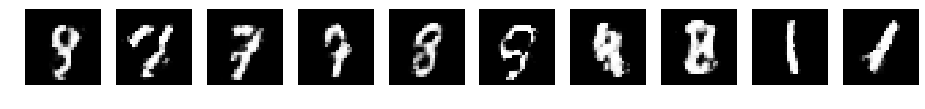

-- Iteration:90000
  d_error: 0.5849413871765137
  g_error: 2.5994410514831543


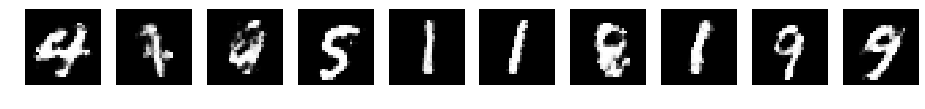

-- Iteration:90500
  d_error: 0.4539901614189148
  g_error: 2.7082760334014893


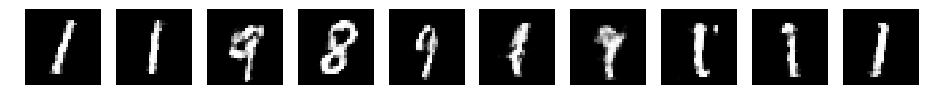

-- Iteration:91000
  d_error: 0.5117664933204651
  g_error: 2.5505502223968506


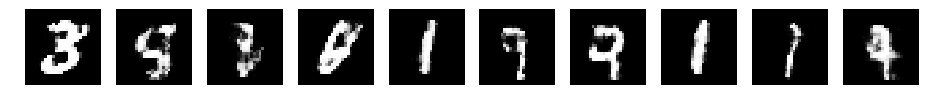

-- Iteration:91500
  d_error: 0.5696290731430054
  g_error: 2.4990909099578857


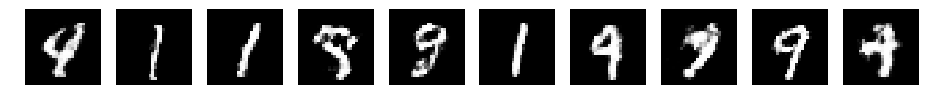

-- Iteration:92000
  d_error: 0.6486414670944214
  g_error: 2.766167163848877


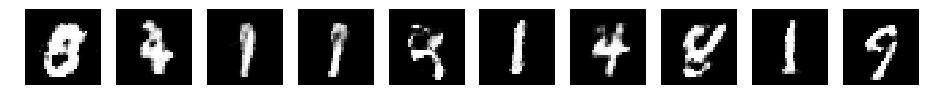

-- Iteration:92500
  d_error: 0.5529164671897888
  g_error: 3.0369319915771484


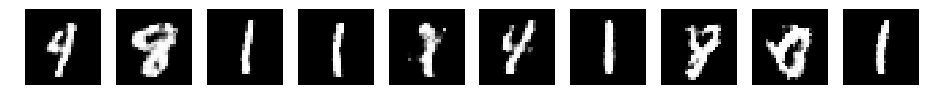

-- Iteration:93000
  d_error: 0.567080557346344
  g_error: 2.6914658546447754


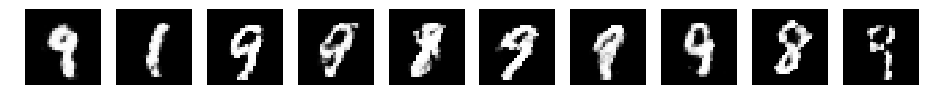

-- Iteration:93500
  d_error: 0.41895735263824463
  g_error: 2.4527947902679443


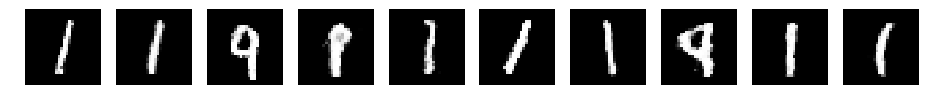

-- Iteration:94000
  d_error: 0.504622757434845
  g_error: 2.728872776031494


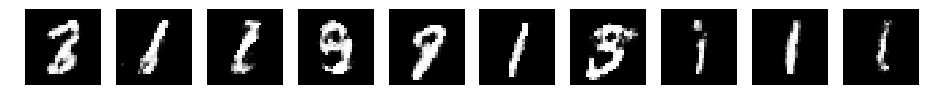

-- Iteration:94500
  d_error: 0.5329623818397522
  g_error: 2.4758834838867188


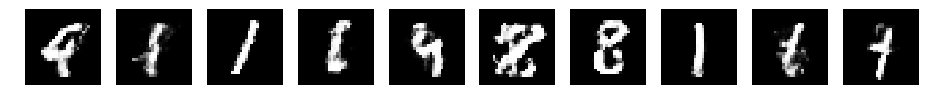

-- Iteration:95000
  d_error: 0.3669966161251068
  g_error: 2.705214500427246


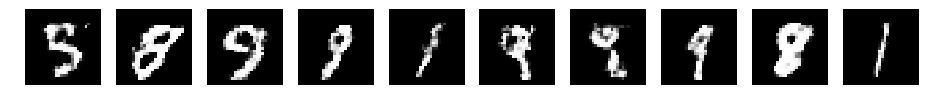

-- Iteration:95500
  d_error: 0.5793631076812744
  g_error: 3.0146288871765137


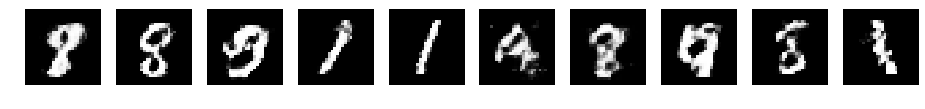

-- Iteration:96000
  d_error: 0.5748703479766846
  g_error: 2.395810842514038


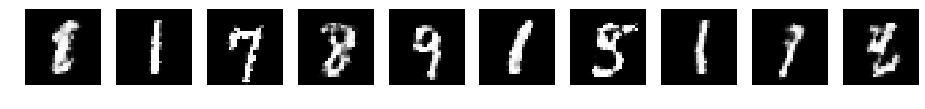

-- Iteration:96500
  d_error: 0.4932968318462372
  g_error: 2.741758346557617


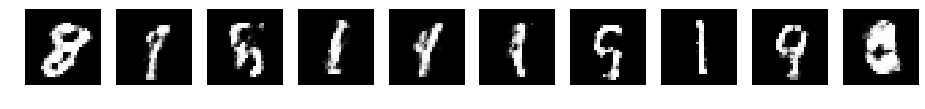

-- Iteration:97000
  d_error: 0.4659492075443268
  g_error: 2.6398351192474365


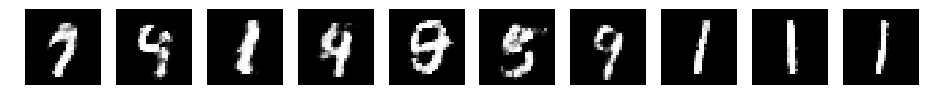

-- Iteration:97500
  d_error: 0.5378950238227844
  g_error: 3.1653828620910645


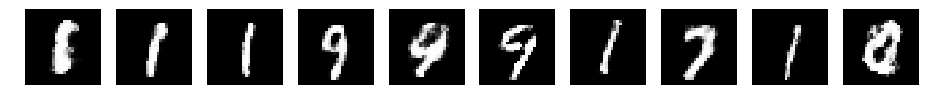

-- Iteration:98000
  d_error: 0.44556525349617004
  g_error: 2.688786029815674


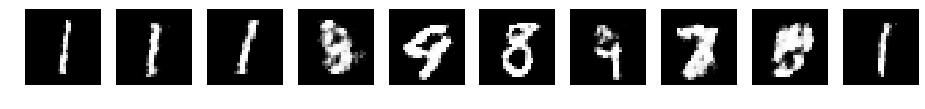

-- Iteration:98500
  d_error: 0.47772884368896484
  g_error: 2.480584144592285


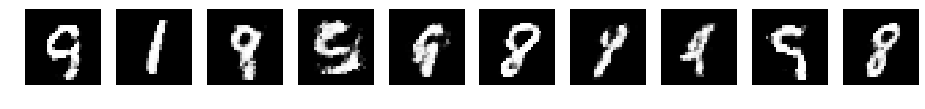

-- Iteration:99000
  d_error: 0.44095614552497864
  g_error: 2.683255910873413


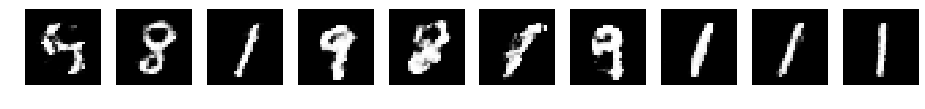

-- Iteration:99500
  d_error: 0.6106583476066589
  g_error: 2.4538817405700684


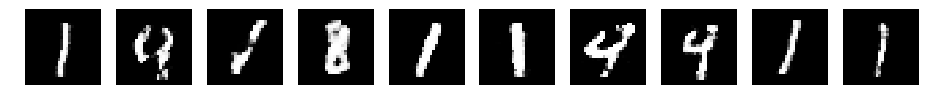

Finished in 353.94160866737366


In [14]:
start_time = time.time()

TRAIN_ITERATIONS = 100000

train_g = tf.train.AdamOptimizer(5e-4).minimize(g_loss, var_list=[g_W1, g_B1, g_W2, g_B2])
train_d = tf.train.AdamOptimizer(5e-4).minimize(d_loss, var_list=[d_W1, d_B1, d_W2, d_B2])

rounds = []
d_loss_values = []
g_loss_values = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for it in range(TRAIN_ITERATIONS):
        for k in range(K):
            batch_x, _ = mnist.train.next_batch(BATCH_SIZE)  # ignore labels
            batch_z = random_z((BATCH_SIZE, Z_SIZE))
            train_d_res, d_error = sess.run([train_d, d_loss], feed_dict={X: batch_x, Z: batch_z})
        
        batch_z = random_z((BATCH_SIZE, Z_SIZE))
        train_g_res, g_error = sess.run([train_g, g_loss], feed_dict={Z: batch_z})
        
        rounds.append(it)       
        d_loss_values.append(d_error)
        g_loss_values.append(g_error)
        if it % 500 == 0:               
            print('-- Iteration:{}'.format(it))
            print("  d_error: {}".format(d_error))
            print("  g_error: {}".format(g_error))
            fake_images = sess.run(g_image, feed_dict={Z: random_z((10, Z_SIZE))})
            show_image(fake_images.reshape((10, IMG_W, IMG_H)))
    
print("Finished in {}".format(time.time() - start_time))

# Result

#### Learning Rate: 5e-4, iteration: 100K

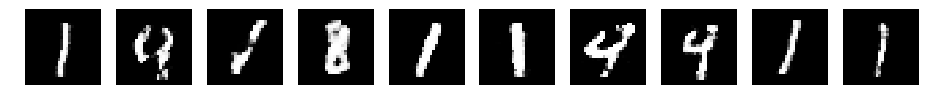

In [15]:
show_image(fake_images.reshape((10, IMG_W, IMG_H)))

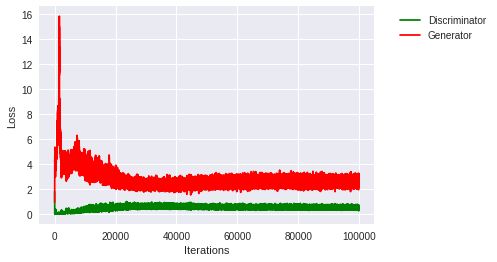

In [16]:
show_loss_chart(rounds, d_loss_values, g_loss_values)

#### Learning Rate: 4e-4, iteration: 60K

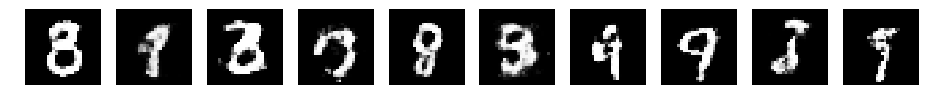

In [25]:
show_image(fake_images.reshape((10, IMG_W, IMG_H)))

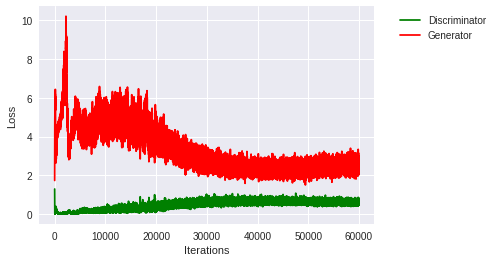

In [26]:
show_loss_chart(rounds, d_loss_values, g_loss_values)

#### Learning Rate: 2e-4, iteration: 40K

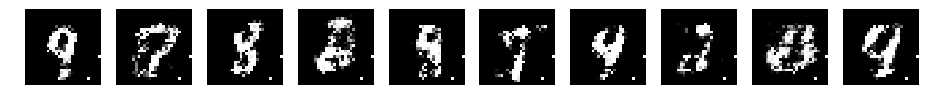

In [22]:
show_image(fake_images.reshape((10, IMG_W, IMG_H)))

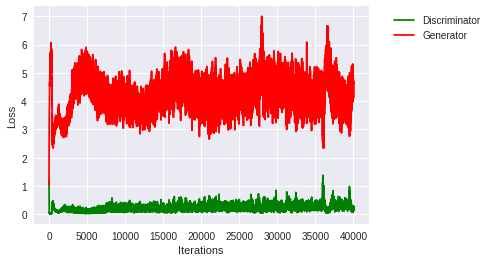

In [23]:
show_loss_chart(rounds, d_loss_values, g_loss_values)

#### Learning Rate: 1e-3, iteration: 20K

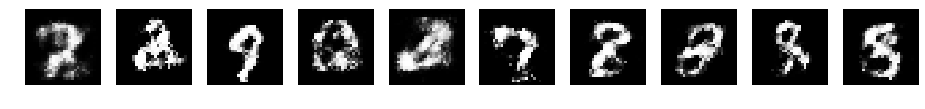

In [18]:
show_image(fake_images.reshape((10, IMG_W, IMG_H)))

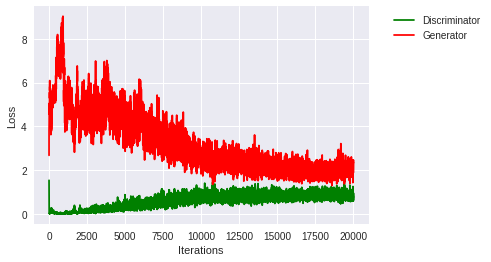

In [19]:
show_loss_chart(rounds, d_loss_values, g_loss_values)

#### Learning Rate: 2e-4, iteration: 20K

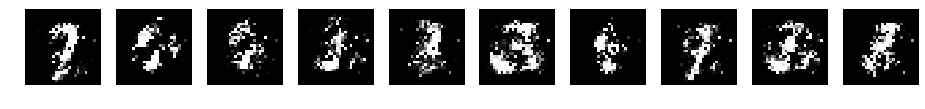

In [15]:
show_image(fake_images.reshape((10, IMG_W, IMG_H)))

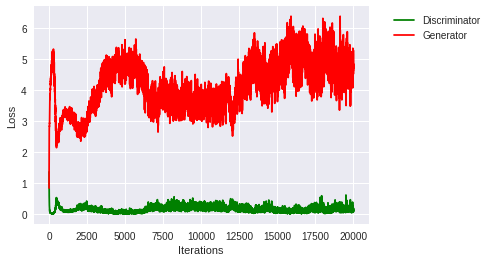

In [16]:
show_loss_chart(rounds, d_loss_values, g_loss_values)